In [1]:
import pandas as pd
from pandas import json_normalize
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('data/MLA_100k.jsonlines', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

In [3]:
df = json_normalize(data)
print(df.columns)

Index(['warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids',
       'base_price', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity',
       'seller_address.comment', 'seller_address.longitude',
       'seller_address.id', 'seller_address.country.name',
       'seller_address.country.id', 'seller_address.address_line',
       'seller_address.latitud

In [4]:
df.head()

,warranty,sub_status,condition,seller_contact,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,...,location.longitude,location.country.name,location.country.id,location.address_line,location.latitude,location.zip_code,location.city.name,location.city.id,location.state.name,location.state.id
0,None,[],new,NaN,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUESTRA REPUTACION,[],used,NaN,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,[],used,NaN,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,[],new,NaN,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MI REPUTACION.,[],used,NaN,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(100000, 92)

In [6]:
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 92 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   warranty                                          39104 non-null   object 
 1   sub_status                                        100000 non-null  object 
 2   condition                                         100000 non-null  object 
 3   seller_contact                                    0 non-null       float64
 4   deal_ids                                          100000 non-null  object 
 5   base_price                                        100000 non-null  float64
 6   non_mercado_pago_payment_methods                  100000 non-null  object 
 7   seller_id                                         100000 non-null  int64  
 8   variations                                       

In [7]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(f"Número de columnas con al menos un nulo: {len(null_columns)}")

Número de columnas con al menos un nulo: 33


In [8]:
df_nulos = df[null_columns.index]

In [9]:
percent_nulos = (df_nulos.isnull().sum() / len(df)) * 100
nulos_resumen = pd.DataFrame({
    "n_nulos": df_nulos.isnull().sum(),
    "%_nulos": percent_nulos.round(2)
})
print(nulos_resumen.sort_values("n_nulos", ascending=False))


                            n_nulos  %_nulos
seller_contact               100000   100.00
subtitle                     100000   100.00
differential_pricing         100000   100.00
catalog_product_id            99989    99.99
shipping.dimensions           99977    99.98
original_price                99857    99.86
official_store_id             99182    99.18
location.country.id           97781    97.78
seller_contact.area_code2     97781    97.78
seller_contact.email          97781    97.78
seller_contact.contact        97781    97.78
seller_contact.webpage        97781    97.78
seller_contact.phone2         97781    97.78
location.open_hours           97781    97.78
seller_contact.phone          97781    97.78
seller_contact.other_info     97781    97.78
seller_contact.area_code      97781    97.78
location.city.name            97781    97.78
location.address_line         97781    97.78
location.latitude             97781    97.78
location.zip_code             97781    97.78
location.n

Para las columnas con un gran porcentaje de nulos se concluye eliminarlas 
Para las que tienen un menor porcentaje de nulos que en este caso serian parent_item_id y shipping.methods tambien se decide eliminarlas puesto que no se consideran relevantes y significativas para predecir la condicion de los productos

In [10]:
cols_con_nulos = df.columns[df.isnull().any()].tolist()

In [11]:
df = df.drop(columns=cols_con_nulos)

In [12]:
df.head()

,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,...,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.tags,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,...,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,[],False,not_specified,-34.62807,-58.398671
1,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,...,Buenos Aires,,Capital Federal,AR-C,True,[],False,me2,-34.593552,-58.505917
2,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,...,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,[],False,me2,-34.623391,-58.414395
3,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,...,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,[],False,me2,-34.628189,-58.492921
4,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,...,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,[],False,not_specified,-34.634655,-58.549504


In [13]:
print("\nResumen estadístico de las columnas numéricas:")
df.describe()


Resumen estadístico de las columnas numéricas:


,base_price,seller_id,price,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,9999.000000,8676.000000,9999.000000


In [14]:
cols_con_listas = df.columns[df.applymap(lambda x: isinstance(x, list)).any()].tolist()
print(f"Columnas con listas: {cols_con_listas}")

C:\Users\valen\AppData\Local\Temp\ipykernel_10172\3529309173.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cols_con_listas = df.columns[df.applymap(lambda x: isinstance(x, list)).any()].tolist()


Columnas con listas: ['sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures', 'shipping.tags']


In [15]:
df_listas = df[cols_con_listas]
df_listas.head()

,sub_status,deal_ids,non_mercado_pago_payment_methods,variations,attributes,tags,coverage_areas,descriptions,pictures,shipping.tags
0,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA578052519-912855983'}],"[{'size': '500x375', 'secure_url': 'https://a2...",[]
1,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA581565358-930764806'}],"[{'size': '499x334', 'secure_url': 'https://a2...",[]
2,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA578780872-916478256'}],"[{'size': '375x500', 'secure_url': 'https://a2...",[]
3,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA581877385-932309698'}],"[{'size': '441x423', 'secure_url': 'https://a2...",[]
4,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA576112692-902981678'}],"[{'size': '375x500', 'secure_url': 'https://a2...",[]


In [16]:
# Filtrar columnas que contienen listas (al menos en una fila)
columnas_con_listas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]

# Crear resumen
resumen = []

for col in columnas_con_listas:
    total = len(df)
    vacios = df[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    porcentaje = (vacios / total) * 100
    resumen.append({
        'columna': col,
        'listas_vacias': vacios,
        'porcentaje': round(porcentaje, 2)
    })

# Convertir a DataFrame y ordenar
resumen_df = pd.DataFrame(resumen).sort_values(by='porcentaje', ascending=False)

print(resumen_df)


                            columna  listas_vacias  porcentaje
6                    coverage_areas         100000      100.00
9                     shipping.tags          99931       99.93
1                          deal_ids          99760       99.76
0                        sub_status          99014       99.01
3                        variations          91808       91.81
4                        attributes          87575       87.58
2  non_mercado_pago_payment_methods          30559       30.56
5                              tags          24910       24.91
7                      descriptions           2688        2.69
8                          pictures            789        0.79


In [17]:
columnas_filtradas = [
    "coverage_areas",
    "shipping.tags",
    "deal_ids",
    "sub_status",
    "variations",
    "attributes",
    "descriptions",
    "pictures"
]
df = df.drop(columns=columnas_filtradas)

In [18]:
df .head()

,condition,base_price,non_mercado_pago_payment_methods,seller_id,site_id,listing_type_id,price,buying_mode,tags,listing_source,...,seller_address.zip_code,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,new,80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,MLA,bronze,80.0,buy_it_now,[dragged_bids_and_visits],,...,,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,False,not_specified,-34.62807,-58.398671
1,used,2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,MLA,silver,2650.0,buy_it_now,[],,...,,Buenos Aires,,Capital Federal,AR-C,True,False,me2,-34.593552,-58.505917
2,used,60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,MLA,bronze,60.0,buy_it_now,[dragged_bids_and_visits],,...,,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,False,me2,-34.623391,-58.414395
3,new,580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,MLA,silver,580.0,buy_it_now,[],,...,,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,False,me2,-34.628189,-58.492921
4,used,30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,MLA,bronze,30.0,buy_it_now,[dragged_bids_and_visits],,...,,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,False,not_specified,-34.634655,-58.549504


In [19]:
def expand_list_column_to_binary(df, column, key=None, prefix=None):
    """
    Convierte una columna con listas (de strings o diccionarios) en variables dummies.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame original.
    column : str
        Nombre de la columna a transformar.
    key : str or None
        Clave a usar si los elementos son diccionarios. None si son strings.
    prefix : str or None
        Prefijo de las columnas nuevas. Usa el nombre de la columna si es None.

    Returns
    -------
    pd.DataFrame
        DataFrame modificado con nuevas columnas binarias.
    """
    prefix = prefix or column
    exploded = df[column].explode()

    if key:
        values = exploded.dropna().apply(lambda x: x.get(key) if isinstance(x, dict) else None)
    else:
        values = exploded.dropna()

    unique_values = values.dropna().unique()

    for val in unique_values:
        col_name = f"{prefix}_{val}"
        df[col_name] = df[column].apply(
            lambda lst: int(any((d.get(key) if key else d) == val for d in lst)) if isinstance(lst, list) else 0
        )

    return df

In [20]:
df = expand_list_column_to_binary(df, 'non_mercado_pago_payment_methods', key='id', prefix='payment')

df = expand_list_column_to_binary(df, 'tags', key=None, prefix='tag')

df.drop(columns=['non_mercado_pago_payment_methods', 'tags'], inplace=True)

temp_df = df.filter(regex='^(payment|tag)_')

In [21]:
columnas_payment_tag = temp_df.columns.tolist()
print(columnas_payment_tag)

['payment_MLATB', 'payment_MLAWC', 'payment_MLAMO', 'payment_MLAOT', 'payment_MLAMC', 'payment_MLAMS', 'payment_MLAVE', 'payment_MLACD', 'payment_MLAVS', 'payment_MLADC', 'payment_MLAAM', 'payment_MLAWT', 'payment_MLAMP', 'payment_MLABC', 'tag_dragged_bids_and_visits', 'tag_good_quality_thumbnail', 'tag_dragged_visits', 'tag_free_relist', 'tag_poor_quality_thumbnail']


Ninguna de estas variables parece significativa para la prediccion de la condicion de un porducto por lo que se decide eliminarlas.

In [22]:
columnas = ['payment_MLATB', 'payment_MLAWC', 'payment_MLAMO', 'payment_MLAOT', 'payment_MLAMC', 'payment_MLAMS', 'payment_MLAVE', 'payment_MLACD', 'payment_MLAVS', 'payment_MLADC', 'payment_MLAAM', 'payment_MLAWT', 'payment_MLAMP', 'payment_MLABC', 'tag_dragged_bids_and_visits', 'tag_good_quality_thumbnail', 'tag_dragged_visits', 'tag_free_relist', 'tag_poor_quality_thumbnail']
df.drop(columns=columnas, inplace=True)

In [23]:
df.shape

(100000, 49)

In [24]:
df.head()

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,category_id,last_updated,...,seller_address.zip_code,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA126406,2015-09-05T20:42:58.000Z,...,,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,False,not_specified,-34.62807,-58.398671
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA10267,2015-09-26T18:08:34.000Z,...,,Buenos Aires,,Capital Federal,AR-C,True,False,me2,-34.593552,-58.505917
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA1227,2015-09-09T23:57:10.000Z,...,,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,False,me2,-34.623391,-58.414395
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,MLA86345,2015-10-05T16:03:50.306Z,...,,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,False,me2,-34.628189,-58.492921
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA41287,2015-08-28T13:37:41.000Z,...,,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,False,not_specified,-34.634655,-58.549504


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   condition                                         100000 non-null  object 
 1   base_price                                        100000 non-null  float64
 2   seller_id                                         100000 non-null  int64  
 3   site_id                                           100000 non-null  object 
 4   listing_type_id                                   100000 non-null  object 
 5   price                                             100000 non-null  float64
 6   buying_mode                                       100000 non-null  object 
 7   listing_source                                    100000 non-null  object 
 8   category_id                                       100000 non-null  object 
 9   last_

In [26]:
print(df.duplicated().sum())

0


In [27]:
df.head()

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,category_id,last_updated,...,seller_address.zip_code,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA126406,2015-09-05T20:42:58.000Z,...,,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,False,not_specified,-34.62807,-58.398671
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA10267,2015-09-26T18:08:34.000Z,...,,Buenos Aires,,Capital Federal,AR-C,True,False,me2,-34.593552,-58.505917
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA1227,2015-09-09T23:57:10.000Z,...,,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,False,me2,-34.623391,-58.414395
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,MLA86345,2015-10-05T16:03:50.306Z,...,,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,False,me2,-34.628189,-58.492921
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA41287,2015-08-28T13:37:41.000Z,...,,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,False,not_specified,-34.634655,-58.549504


In [28]:
print("\nDistribución de la variable objetivo (condition):")
print(df['condition'].value_counts())


Distribución de la variable objetivo (condition):
condition
new     53758
used    46242
Name: count, dtype: int64


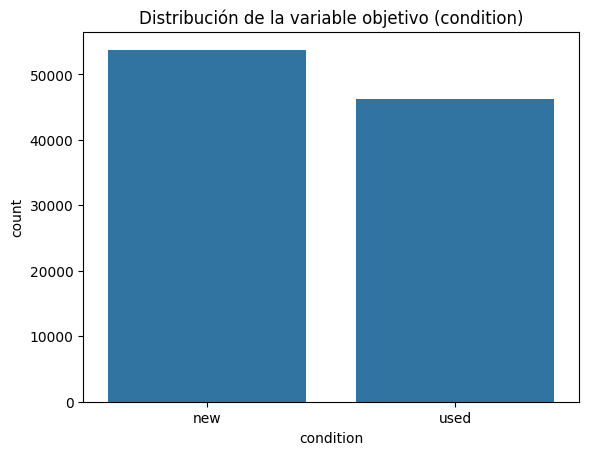

In [29]:
sns.countplot(data=df, x='condition')
plt.title("Distribución de la variable objetivo (condition)")
plt.show()

In [30]:
print(f"Número de filas donde los valores son diferentes: {(df['base_price'] != df['price']).sum()}")

Número de filas donde los valores son diferentes: 29


In [31]:
selected_features = ['listing_type_id', 'price',  'buying_mode', 'automatic_relist', 'initial_quantity', 'sold_quantity', 'available_quantity', 
                     'shipping.local_pick_up', 'shipping.free_shipping']

# Crear un DataFrame final con las características seleccionadas y la variable objetivo
df_model = df[selected_features + ['condition']]

In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_type_id         100000 non-null  object 
 1   price                   100000 non-null  float64
 2   buying_mode             100000 non-null  object 
 3   automatic_relist        100000 non-null  bool   
 4   initial_quantity        100000 non-null  int64  
 5   sold_quantity           100000 non-null  int64  
 6   available_quantity      100000 non-null  int64  
 7   shipping.local_pick_up  100000 non-null  bool   
 8   shipping.free_shipping  100000 non-null  bool   
 9   condition               100000 non-null  object 
dtypes: bool(3), float64(1), int64(3), object(3)
memory usage: 5.6+ MB


In [33]:
unique_values = df_model['listing_type_id'].unique()
print(f"Valores únicos en 'listing_type_id': {unique_values}")

Valores únicos en 'listing_type_id': ['bronze' 'silver' 'free' 'gold_special' 'gold' 'gold_premium' 'gold_pro']


In [34]:
unique_values = df_model['buying_mode'].unique()
print(f"Valores únicos en 'buying_mode': {unique_values}")

Valores únicos en 'buying_mode': ['buy_it_now' 'classified' 'auction']


In [35]:
df_model['condition'] = df_model['condition'].map({'new': 1, 'used': 0})

C:\Users\valen\AppData\Local\Temp\ipykernel_10172\1657064261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['condition'] = df_model['condition'].map({'new': 1, 'used': 0})


In [36]:
df_model['automatic_relist'] = df_model['automatic_relist'].astype(int)
df_model['shipping.local_pick_up'] = df_model['shipping.local_pick_up'].astype(int)
df_model['shipping.free_shipping'] = df_model['shipping.free_shipping'].astype(int)

C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['automatic_relist'] = df_model['automatic_relist'].astype(int)
C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['shipping.local_pick_up'] = df_model['shipping.local_pick_up'].astype(int)
C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [37]:
print("\nDataFrame final para el modelo:")
df_model.head()


DataFrame final para el modelo:


,listing_type_id,price,buying_mode,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,condition
0,bronze,80.0,buy_it_now,0,1,0,1,1,0,1
1,silver,2650.0,buy_it_now,0,1,0,1,1,0,0
2,bronze,60.0,buy_it_now,0,1,0,1,1,0,0
3,silver,580.0,buy_it_now,0,1,0,1,1,0,1
4,bronze,30.0,buy_it_now,0,1,0,1,1,0,0


In [38]:
df_model.to_csv('data/processed_data.csv', index=False)
print("\nDatos procesados guardados en 'processed_data.csv'.")


Datos procesados guardados en 'processed_data.csv'.
